In [1]:
import lal
import lalsimulation
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import unicode_literals

In [2]:
style = "times"

if style=="times":
    plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')
else:
    plt.style.use('/home/hosilva/tools/mplstyle/computermodernstyle.mplstyle')

In [3]:
data_GW150914_gr     = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/gr/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_cs    = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/p4_l_df0_dtau0_CS_220203_1052/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [4]:
GW150914_gr = np.vstack([data_GW150914_gr['chi_eff'], data_GW150914_gr['redshift'], data_GW150914_gr['m1'], data_GW150914_gr['m2'], data_GW150914_gr['mtotal'], data_GW150914_gr['mf_evol'], data_GW150914_gr['af_evol']]).T
GW150914_cs = np.vstack([data_GW150914_cs['chi_eff'], data_GW150914_cs['redshift'], data_GW150914_cs['m1'], data_GW150914_cs['m2'], data_GW150914_cs['mtotal'], data_GW150914_cs['mf_evol'], data_GW150914_cs['af_evol']]).T

Same type of plots, but using ChainConsumer

In [5]:
from chainconsumer import ChainConsumer

In [6]:
param_list = [r"$\chi_{\rm eff}$", r"$z$",
              r"$m_1$ [M$_{\odot}$]", r"$m_2$ [M$_{\odot}$]", r"$M$ [M$_{\odot}$]",
              r"$M_{\rm f}$ [M$_{\odot}$]", r"$a_{\rm f}$"]

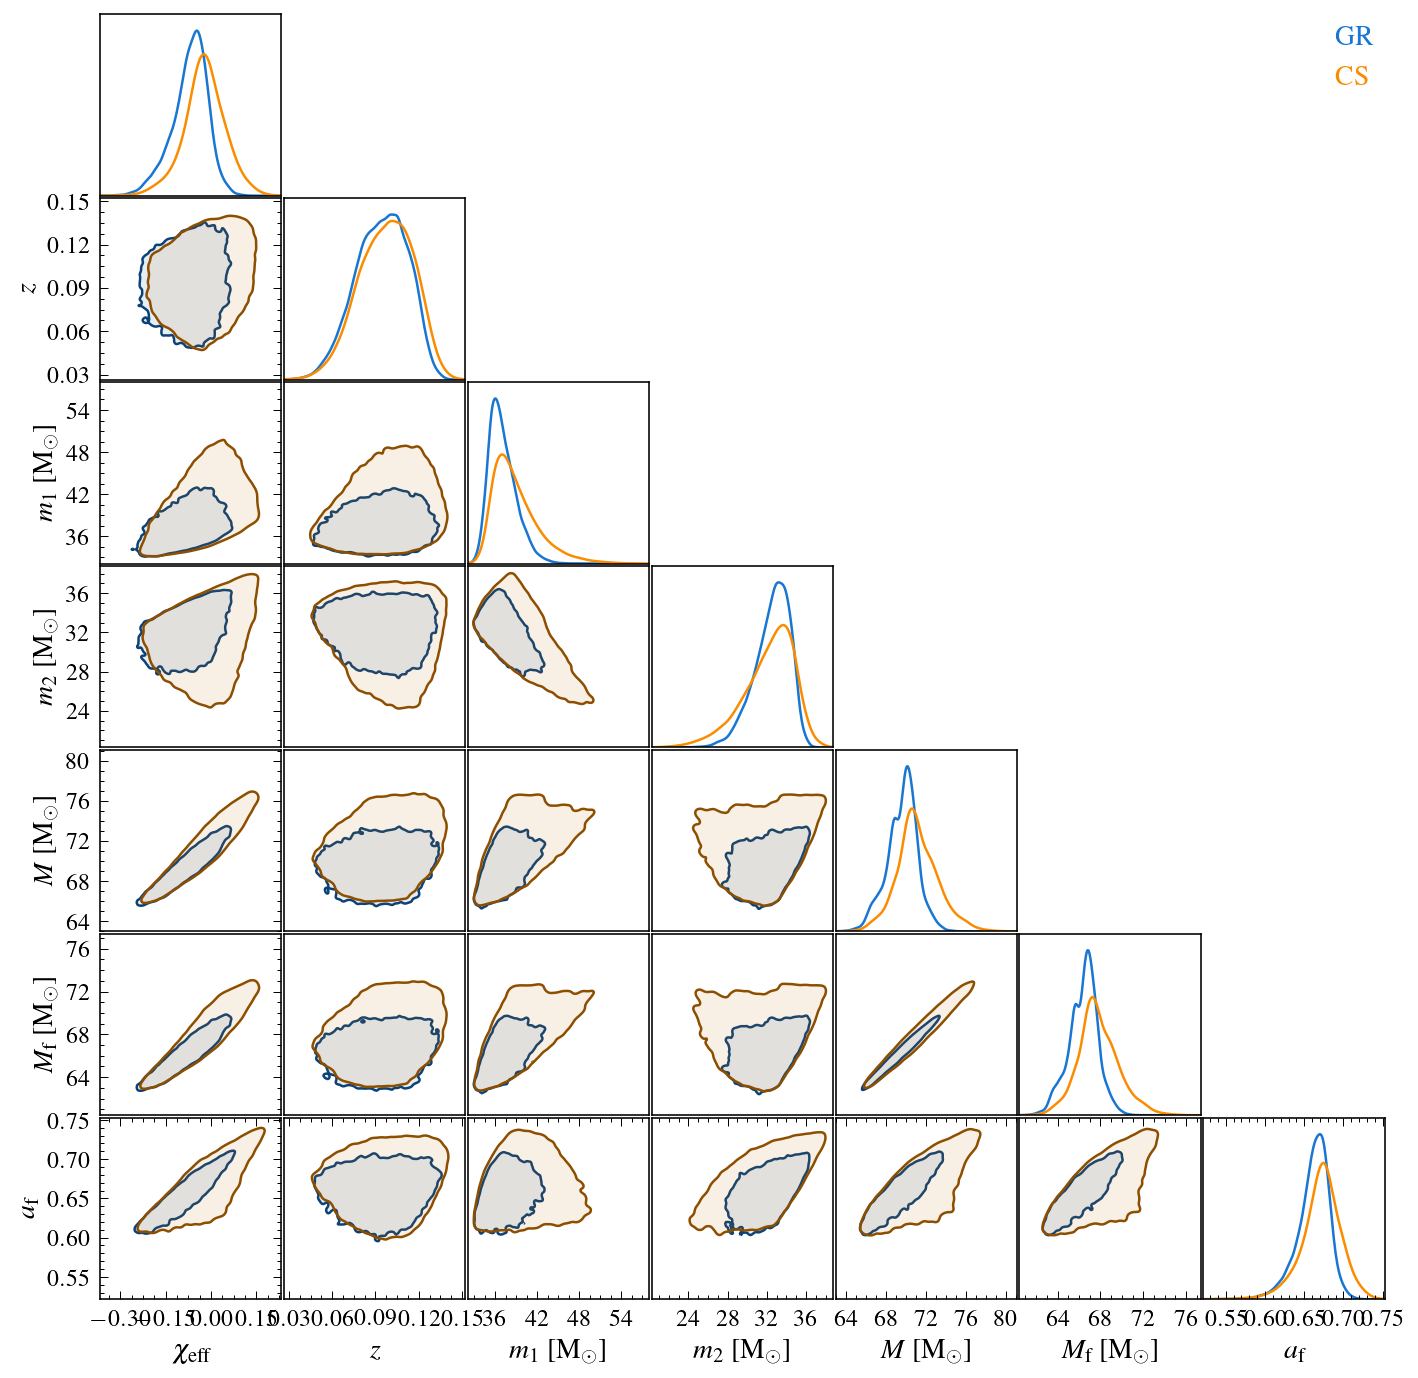

In [7]:
c = ChainConsumer()

c.add_chain(GW150914_gr, parameters=param_list, name="GR")
c.add_chain(GW150914_cs, parameters=param_list, name="CS")
c.configure(linestyles=["-", "-"], 
            linewidths=[1.25, 1.25],
            colors=['b', 'o'],
            sigmas=[2],
            spacing=1/4., 
            shade_alpha=[0.1, 0.1],
            bar_shade=[False, False],
            diagonal_tick_labels=False,
            tick_font_size=12,
            label_font_size=14)

fig = c.plotter.plot(figsize='GROW',
                     # extents={r"$M_f$ [M$_{\odot}$]":(50,70), r"$\chi_f$": (0.5, 0.8)}
                    )

# # Trick from corner, which we can apply here as well
# axes = np.array(fig.axes).reshape((2, 2))
# axes[1, 0].xaxis.set_ticks(ticks=np.arange(50, 70 + 5, 5));
# axes[0, 0].axis('off')
# axes[1, 0].yaxis.set_ticks(ticks=np.arange(0.5, 0.8 + 0.1, 0.1));
# axes[1, 1].axis('off')

fig.savefig('fig_output/tmp_GW150914_intrinsic_params.pdf')

In [116]:
print(len(GW150914_gr_hos_z), len(GW150914_gr_z))

12876 14096


In [23]:
fig.savefig('fig_output/tmp_GW150914_intrinsic_params.png')

Similar plot, but only with remnant parameters.

In [13]:
GW150914_gr = np.vstack([(1. + data_GW150914_gr['redshift']) * data_GW150914_gr['mf_evol'], data_GW150914_gr['af_evol']]).T
GW150914_cs = np.vstack([(1. + data_GW150914_cs['redshift']) * data_GW150914_cs['mf_evol'], data_GW150914_cs['af_evol']]).T
param_list  = [r"$(1 + z) M_{f}$", r"$\chi_{f}$"]

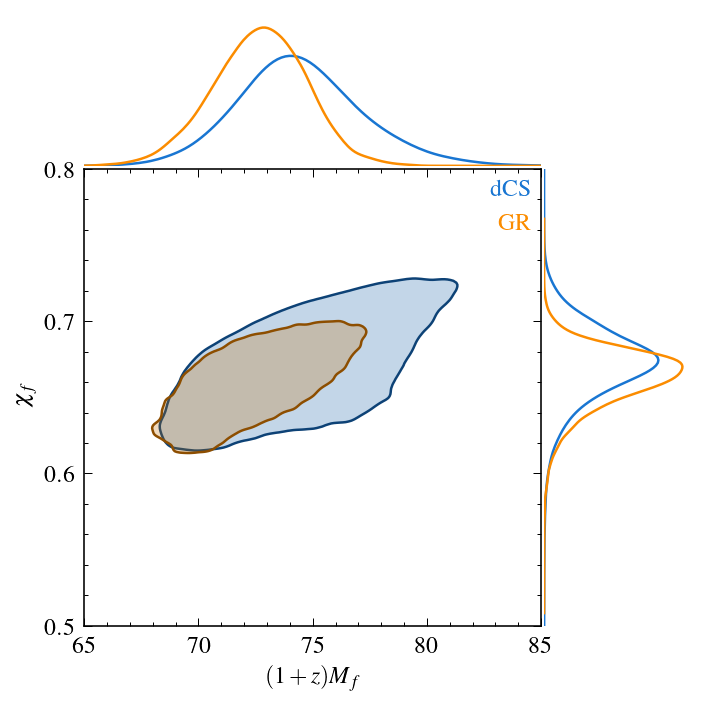

In [47]:
c = ChainConsumer()

c.add_chain(GW150914_cs, parameters=param_list, name=r"dCS")
c.add_chain(GW150914_gr, parameters=param_list, name=r"GR")
c.configure(linestyles=["-", "-"], 
            linewidths=[1.25, 1.25],
            colors=['b', 'o'],
            sigma2d=False,
            sigmas=[1.65],
            spacing=1/5., 
            shade_alpha=[0.25, 0.25],
            bar_shade=[False, False],
            diagonal_tick_labels=False,
            tick_font_size=12,
            label_font_size=12)

fig = c.plotter.plot(figsize="COLUMN",
                     extents={param_list[0]:(65, 85), param_list[1]: (0.5, 0.8)})

# Trick from corner, which we can apply here as well
axes = np.array(fig.axes).reshape((2, 2))
axes[1, 0].xaxis.set_ticks(ticks=np.arange(65, 85 + 5, 5));
axes[0, 0].axis('off')
axes[1, 0].yaxis.set_ticks(ticks=np.arange(0.5, 0.8 + 0.1, 0.1));
axes[1, 1].axis('off')

# plt.tight_layout()

fig.savefig('fig_output/tmp_GW150914_intrinsic_params_remnant.pdf')
# fig.savefig('fig_output/tmp_GW150914_intrinsic_params_remnant.png')

In [15]:
param_list[1]

'$\\chi_{f}$'